In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from urllib.request import urlopen
import seaborn as sns
import requests
from bs4 import BeautifulSoup


In [2]:
'''
In this part we will parse the web page for the files names (xxx.json)
This will serves us later for automation purpuse
'''
url = 'https://github.com/hypeindex/excercise/tree/main/jsons/'
page = requests.get(url)
file_names = []
soup = BeautifulSoup(page.text, "html.parser")
list = soup.findAll("span", class_="css-truncate css-truncate-target d-block width-fit")
for row in list:
    file_names.append(row.text)
file_names

['14376.json',
 '1886.json',
 '29578.json',
 '3429.json',
 '35390.json',
 '43.json',
 '563.json',
 '589.json',
 '625.json',
 '653.json',
 '7.json',
 '72.json',
 '86.json',
 '896.json']

In [3]:
'''
Creating the full path name for each file
'''
paths = []
for file in file_names:
    paths.append('https://excercise-hi.s3.amazonaws.com/' + file)
paths

['https://excercise-hi.s3.amazonaws.com/14376.json',
 'https://excercise-hi.s3.amazonaws.com/1886.json',
 'https://excercise-hi.s3.amazonaws.com/29578.json',
 'https://excercise-hi.s3.amazonaws.com/3429.json',
 'https://excercise-hi.s3.amazonaws.com/35390.json',
 'https://excercise-hi.s3.amazonaws.com/43.json',
 'https://excercise-hi.s3.amazonaws.com/563.json',
 'https://excercise-hi.s3.amazonaws.com/589.json',
 'https://excercise-hi.s3.amazonaws.com/625.json',
 'https://excercise-hi.s3.amazonaws.com/653.json',
 'https://excercise-hi.s3.amazonaws.com/7.json',
 'https://excercise-hi.s3.amazonaws.com/72.json',
 'https://excercise-hi.s3.amazonaws.com/86.json',
 'https://excercise-hi.s3.amazonaws.com/896.json']

In [4]:
'''
Testing to see if it working well on one file
'''
path = paths[0]
with urlopen(path) as f:    
    d = json.load(f) 
df = pd.json_normalize(d['data'])
df = df.rename(columns={"datetime":"Date"})
df.head()

,Date,hype,price,volume
0,2019-12-30 12:00,0,10.31,60300.0
1,2020-01-06 12:00,0,10.325,68700.0
2,2020-01-13 12:00,0,10.35,25600.0
3,2020-01-20 12:00,0,10.34,356700.0
4,2020-01-27 12:00,1,10.34,100000.0


In [5]:

'''
MAin loop to create each assete in a seperate xxx.csv file
ploting the chart: scatter plot for price and hype, price/volume/hype per date, corralation matrix  
''' 

for path in paths:
    # extracting the data frm the web
    with urlopen(path) as data:    
        d = json.load(data) 
    df = pd.json_normalize(d['data'])
    df = df.rename(columns={"datetime":"Date"})
    df =df.dropna(subset=['Date','hype','price'])
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    # creating for each asset its name
    file_name = path.split('/')[-1].split('.')[0] + '.csv'
    # saving all to .csv file for later anlysis if needed
    df.to_csv(file_name)
    
    # Scaling and printing graphs
    # scale all parameters 
    #scaler = preprocessing.StandardScaler().fit(df)
    #X_scaled = pd.DataFrame(scaler.transform(df),columns=['hype','price','vol'])    
    # create corr matrix
    #corr_mat = X_scaled[['hype','price','vol']].corr()
    # Ploting section
    #fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
    #fig.suptitle('Weekly Price_' + file_name.split('.')[0])
    #X_scaled.plot(kind='scatter', x='price', y='hype', color='darkblue', ax=ax1)
    #X_scaled.plot(figsize=plotsize,ax=ax2)
    #sns.heatmap(corr_mat,cmap="YlGnBu",ax=ax3, vmin=0, vmax=1,annot=True,)
    #ax1.set(xlabel='Price', ylabel='Hype')
    #ax2.set(xlabel='Price')
    #plt.show()

In [6]:
'''
Replacing all xxx.json format into xxx.csv format
This is more convenient to work with
'''
files = []
for file_name in file_names:
    #print(file_name)
    file = file_name.replace('.json','.csv')
    files.append(file)
print(len(files))

14


In [7]:
'''
Helper function for:
- Fetching the data from local folder in xxx.csv format
- scaling the data
- ploting the data
'''
plotsize=(20,7)
def print_asset(file_name):
    df = pd.read_csv(file_name)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    scaler = preprocessing.StandardScaler().fit(df)
    X_scaled = pd.DataFrame(scaler.transform(df),columns=['hype','price','vol'])    
    # create corr matrix
    corr_mat = X_scaled[['hype','price','vol']].corr()
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
    fig.suptitle('Weekly Price_' + file_name.split('.')[0])
    X_scaled.plot(kind='scatter', x='price', y='hype', color='darkblue', ax=ax1)
    X_scaled.plot(figsize=plotsize,ax=ax2)
    sns.heatmap(corr_mat,cmap="YlGnBu",ax=ax3, vmin=0, vmax=1,annot=True,)
    ax1.set(xlabel='Price', ylabel='Hype')
    ax2.set(xlabel='Price')
    #plt.show()
    return corr_mat['price'][0];

### It is more convenient to show the results this way rather than in for loop (The window size is not effective)
### Also, I choose to include vol as it show good correlation with price and hype

In [8]:
scores={}

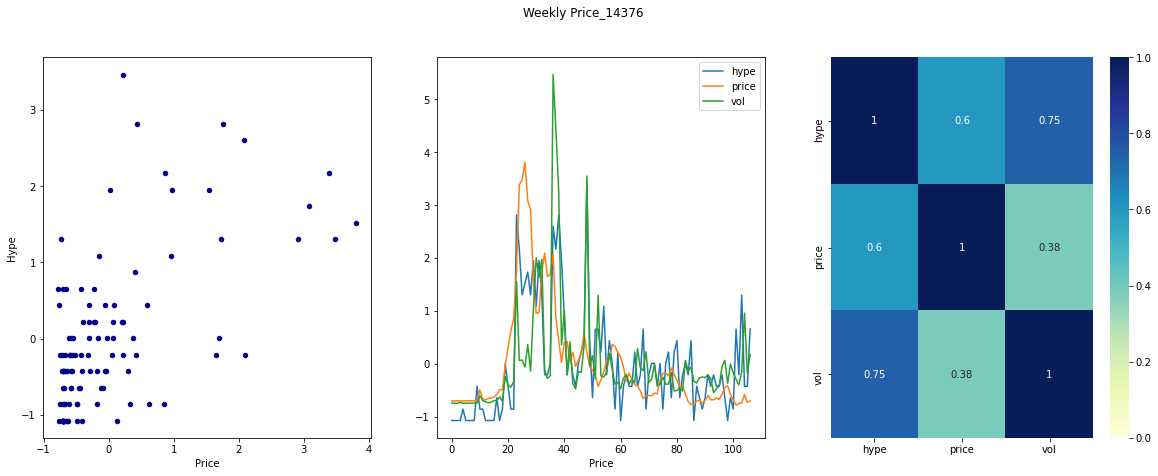

In [9]:
scores[files[0].split('.')[0]]=print_asset(files[0])

1. Hype and Price show correlation in the scatter plot \
   High correlation in the corr matrix (0.6) 
2. Hype and vol show high correlation (0.75) 
3. Price and Vol show 0.38 correlation 
### Hype preceding Vol in the price prediction 
### Also while price is decreasing, Hype show more moderate spikes then Vol

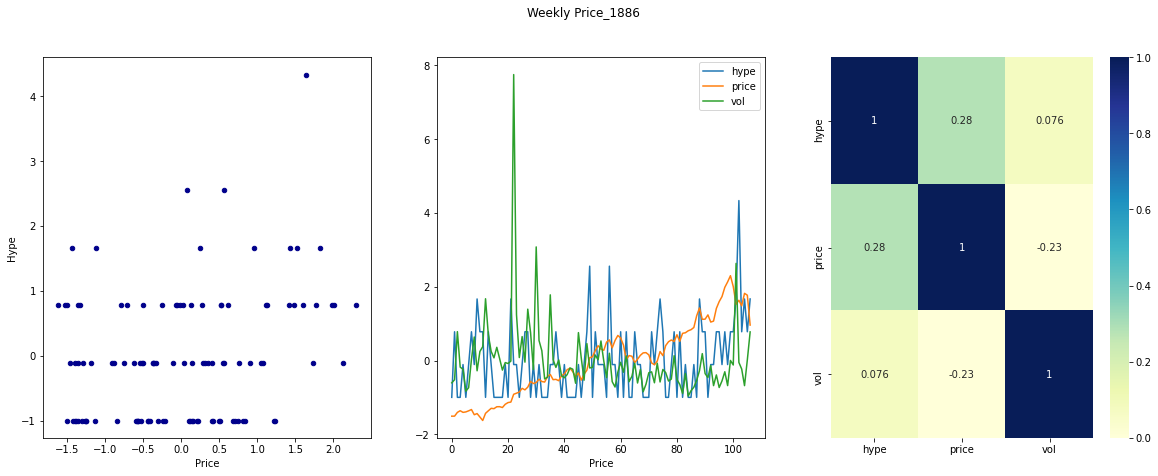

In [10]:
scores[files[1].split('.')[0]]=print_asset(files[1])

1. Hype and Price show no correlation in the scatter plot \
   Low correlation in the corr matrix (0.28) 
2. Hype and vol show no correlation (0.076) 
### Price and Hype show some correlation, but it is not obvious from the scatter plot.
### In the price chart when price goes up, hype tend to go up with him as well.
### (Looks more like a categorical spread)

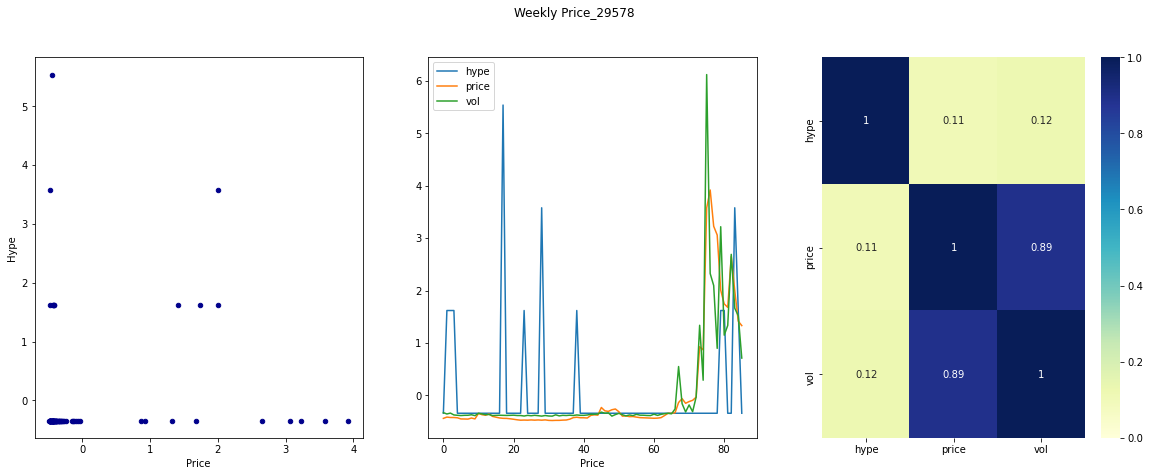

In [11]:
scores[files[2].split('.')[0]]=print_asset(files[2])

1. Hype and Price show no correlation in the scatter plot \
   Low correlation in the corr matrix (0.11) 
2. Hype and vol show low correlation (0.12) 
### We cant say much in this case on hype
###  On the other hand price and vol are highly correlated.

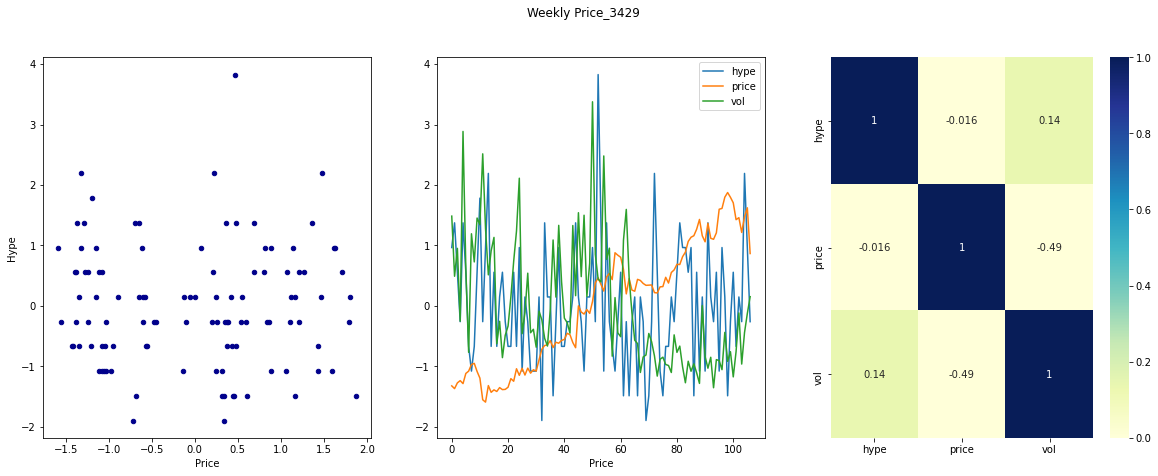

In [12]:
scores[files[3].split('.')[0]]=print_asset(files[3])

1. Hype and Price show no correlation in the scatter plot \
   Low (negative) correlation in the corr matrix (-0.016) 
2. Hype and vol show no correlation (0.14) 
### We cant say much in this case on hype
###  On the other hand price and vol are highly correlated. (negative)

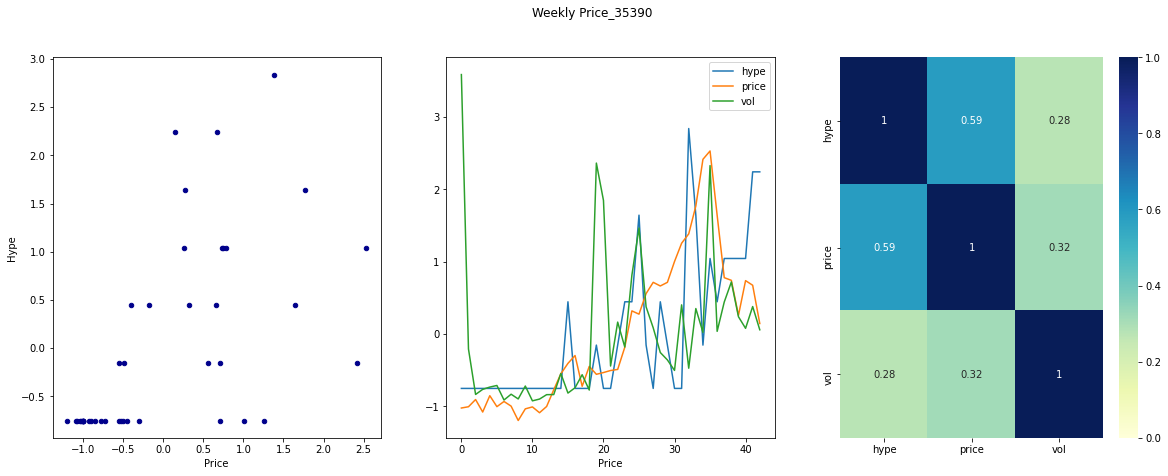

In [13]:
scores[files[4].split('.')[0]]=print_asset(files[4])

1. Hype and Price show high (spreaded) correlation in the scatter plot \
   High correlation in the corr matrix (0.59) 
2. Hype and vol show low correlation (0.28) 
### We can see that price and hype are very correleted.
### From the scatter plot we can see thet the spread is very large


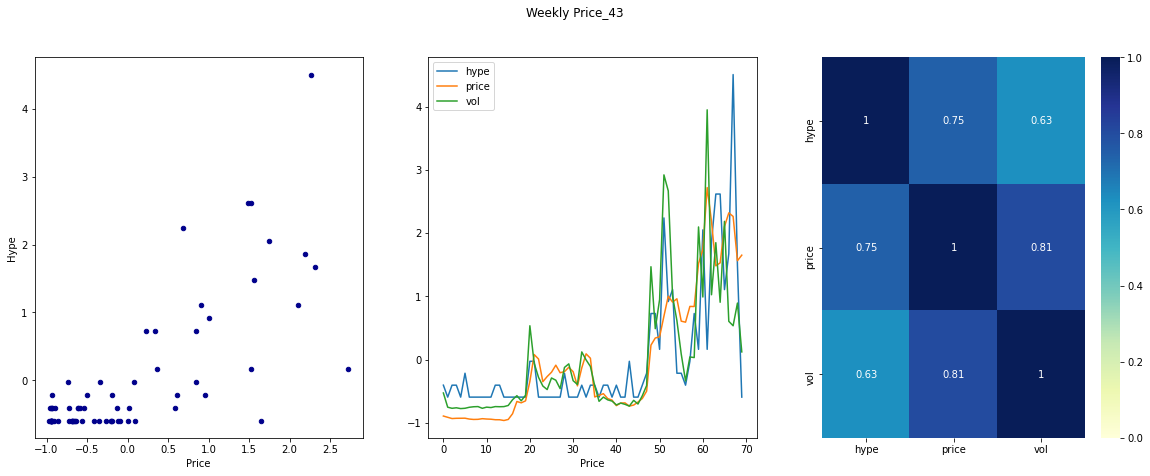

In [14]:
scores[files[5].split('.')[0]]=print_asset(files[5])

1. Hype and Price show high correlation in the scatter plot \
   High correlation in the corr matrix (0.75) 
2. Hype and vol show high correlation (0.63) 
### We can see that price and hype are highly correleted.
### Also price and vol are highly correlated. 

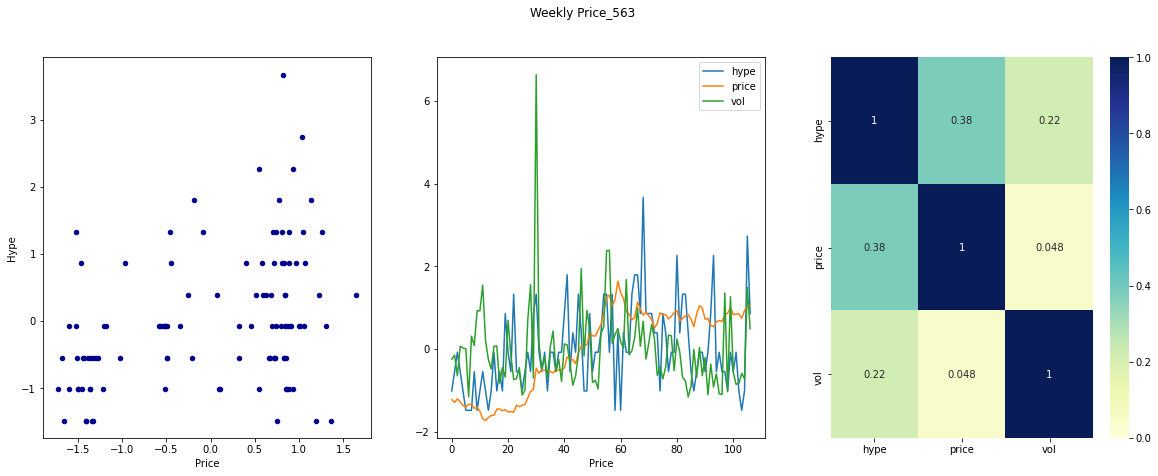

In [15]:
scores[files[6].split('.')[0]]=print_asset(files[6])

1. Hype and Price show low correlation in the scatter plot \
   Low correlation in the corr matrix (0.38) 
2. Hype and vol show low correlation (0.22) 

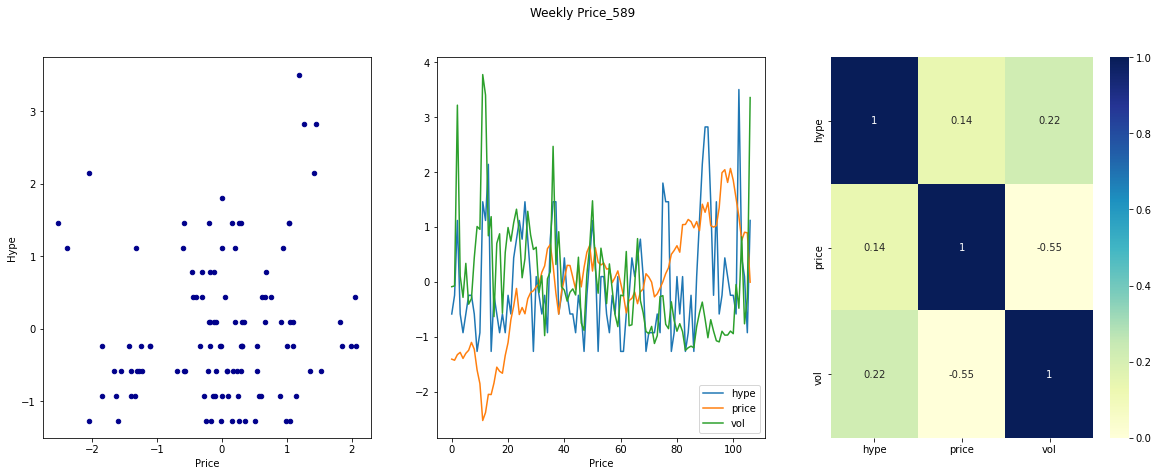

In [16]:
scores[files[7].split('.')[0]]=print_asset(files[7])

1. Hype and Price show low correlation in the scatter plot \
   Low correlation in the corr matrix (0.14) 
2. Hype and vol show low correlation (0.22) 

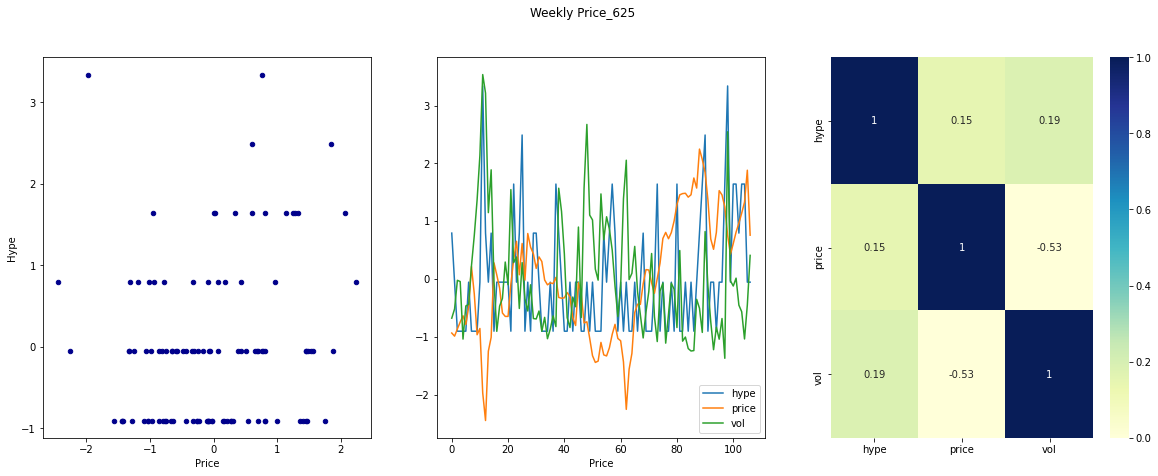

In [17]:
scores[files[8].split('.')[0]]=print_asset(files[8])

1. Hype and Price show no correlation in the scatter plot \
   Low correlation in the corr matrix (0.15) 
2. Hype and vol show low correlation (0.19) 

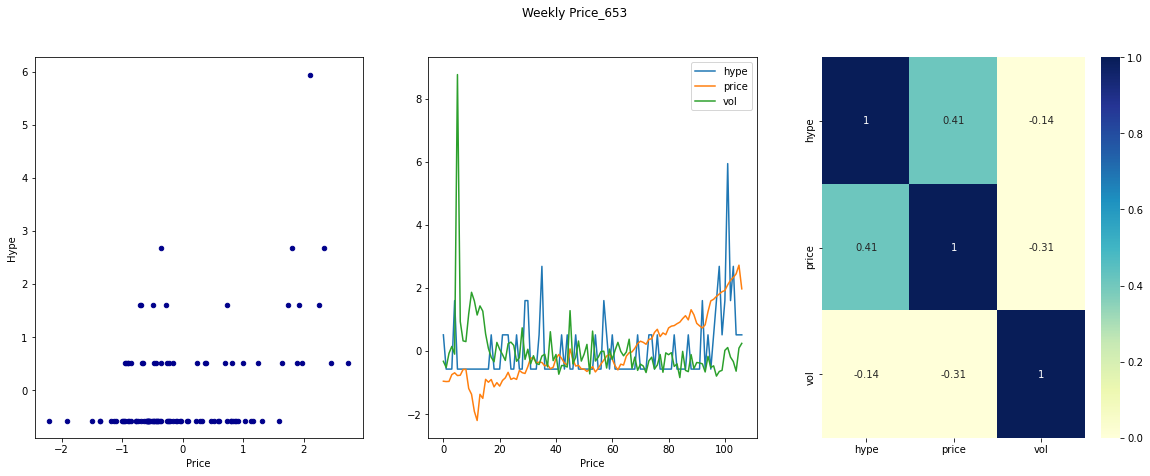

In [18]:
scores[files[9].split('.')[0]]=print_asset(files[9])

1. Hype and Price show high correlation in the scatter plot \
   High correlation in the corr matrix (0.41) 
2. Hype and vol show low (negative) correlation (-0.14) 

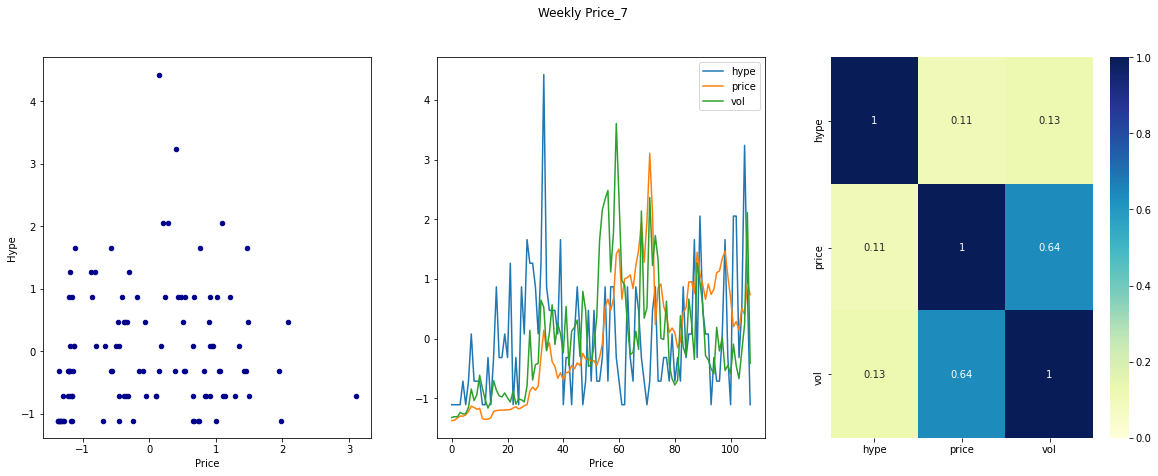

In [19]:
scores[files[10].split('.')[0]]=print_asset(files[10])

1. Hype and Price show no correlation in the scatter plot \
   Low correlation in the corr matrix (0.11) 
2. Hype and vol show no correlation (0.13) 

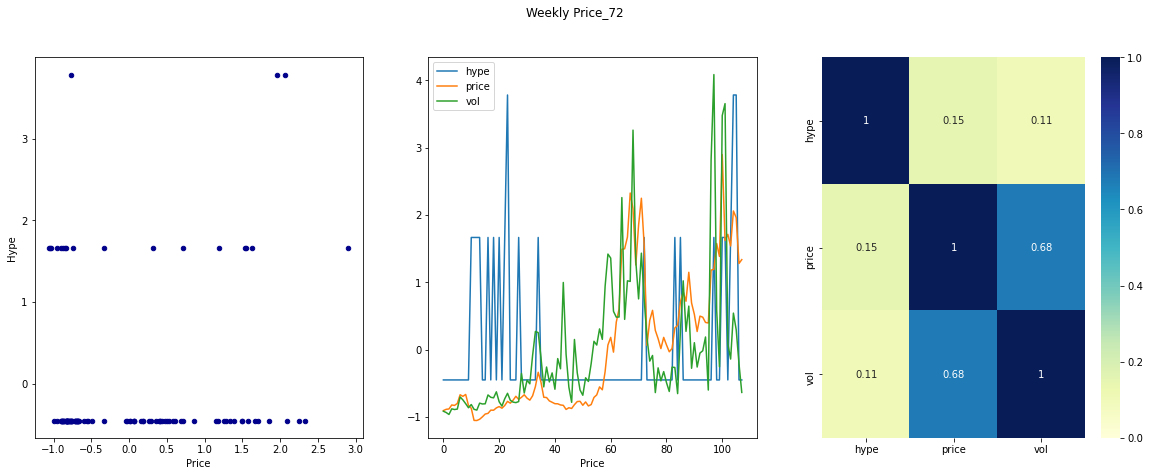

In [20]:
scores[files[11].split('.')[0]]=print_asset(files[11])

1. Hype and Price show no correlation in the scatter plot \
   Low correlation in the corr matrix (0.15) 
2. Hype and vol show low correlation (0.11) 

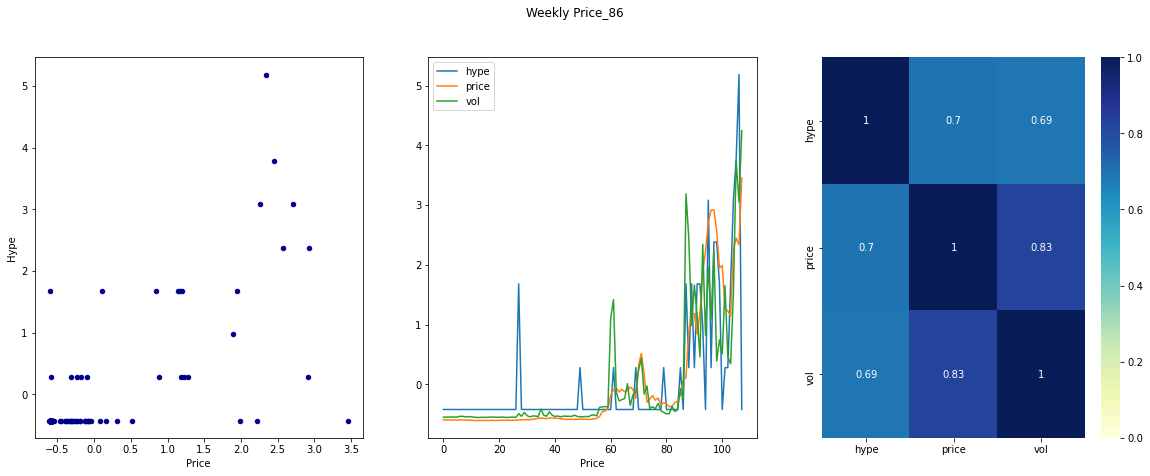

In [21]:
scores[files[12].split('.')[0]]=print_asset(files[12])

1. Hype and Price show high correlation in the scatter plot \
   High correlation in the corr matrix (0.7) 
2. Hype and vol show high correlation (0.69) 
### We can see that price and hype are highly correleted.
### Also price and vol are highly correlated. 

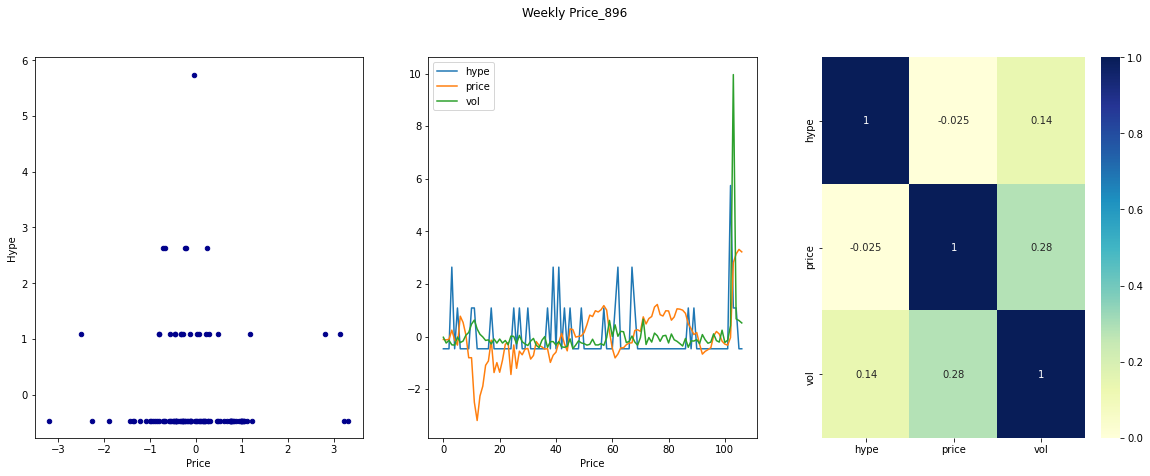

In [22]:
scores[files[13].split('.')[0]]=print_asset(files[13])

1. Hype and Price show no correlation in the scatter plot \
   Low (negative) correlation in the corr matrix (-0.025) 
2. Hype and vol show low correlation (0.14) 

In [59]:
def create_df(dic,col_name):

    return (df)

In [100]:
#df_corr=(create_df(scores,'Correlation'))
df_corr = pd.DataFrame.from_dict(scores, orient='index',columns=['Correlation'])
df_corr = df_corr.reset_index()
df_corr = df_corr.rename(columns={"index": "Model"})
df_corr = df_corr.sort_values(by=['Correlation'],ascending=False)
#this line is due to error when combining two df with different index type (object and int64)
df_corr.Model = df_corr.Model.astype('int64')
df_corr = df_corr.set_index('Model')
df_corr.index

Int64Index([43, 86, 14376, 35390, 653, 563, 1886, 72, 625, 589, 29578, 7, 3429,
            896],
           dtype='int64', name='Model')

### Two of the assetes: 43 and 83 are much the same
### Showing high correlation between: hype and price, price and vol, vol and hype
### Asset 43 is more tight in the scatter plot --> better correlation.

### Running the same flow w/o volume for comparison

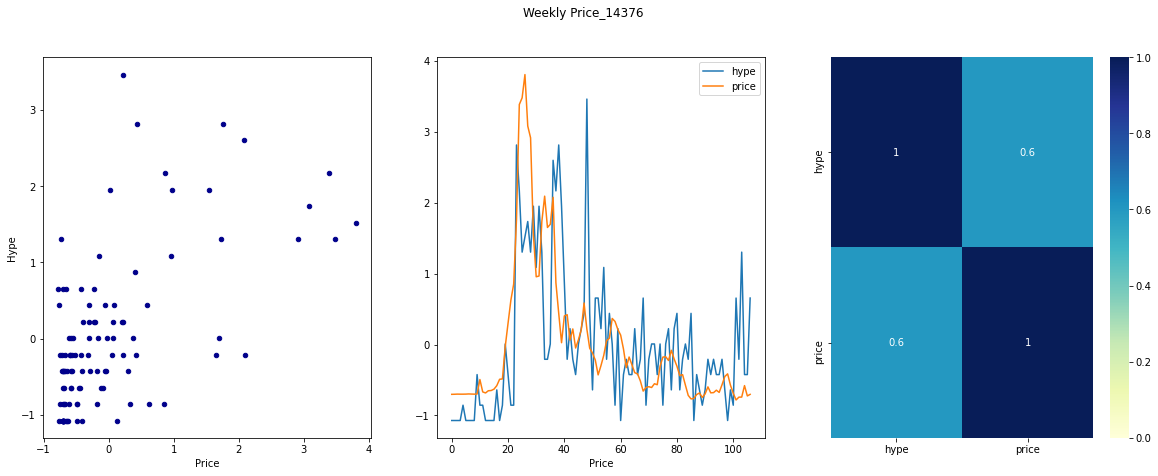

In [25]:
df=pd.read_csv(files[0])
df.drop('volume',axis=1,inplace=True)

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
scaler = preprocessing.StandardScaler().fit(df)
X_scaled = pd.DataFrame(scaler.transform(df),columns=['hype','price'])    
# create corr matrix
corr_mat = X_scaled[['hype','price']].corr()
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
fig.suptitle('Weekly Price_' + files[0].split('.')[0])
X_scaled.plot(kind='scatter', x='price', y='hype', color='darkblue', ax=ax1)
X_scaled.plot(figsize=plotsize,ax=ax2)
sns.heatmap(corr_mat,cmap="YlGnBu",ax=ax3, vmin=0, vmax=1,annot=True,)
ax1.set(xlabel='Price', ylabel='Hype')
ax2.set(xlabel='Price');


0.5999349328252939

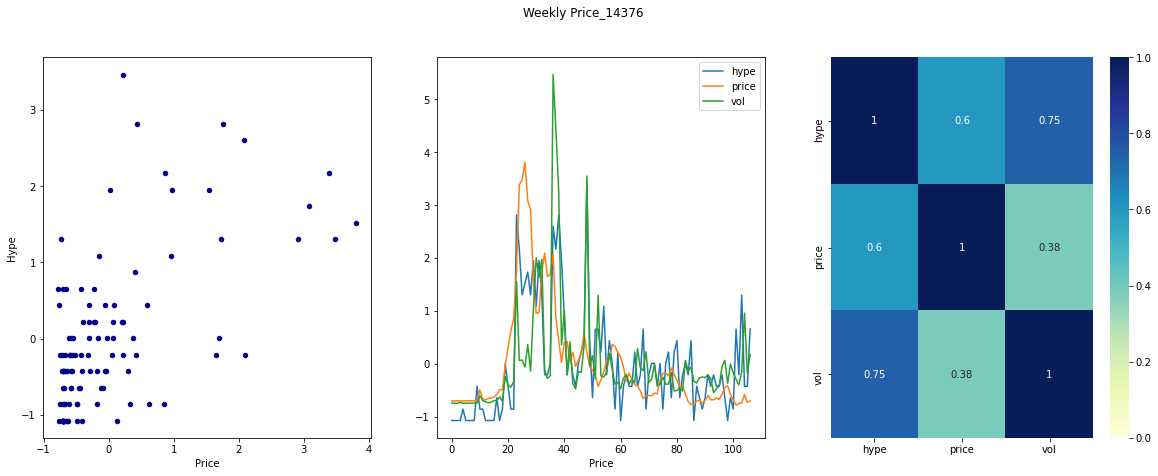

In [26]:
print_asset(files[0])

## Linear Regression

In [27]:
lr = LinearRegression()
s = StandardScaler()
#df=pd.read_csv(files[0])
#df.drop('volume',axis=1,inplace=True)
#df['Date'] = pd.to_datetime(df['Date'])
#df = df.set_index('Date')
file_names

['14376.json',
 '1886.json',
 '29578.json',
 '3429.json',
 '35390.json',
 '43.json',
 '563.json',
 '589.json',
 '625.json',
 '653.json',
 '7.json',
 '72.json',
 '86.json',
 '896.json']

In [28]:
'''
Helper function to calculate for each model it R^2 with polynomial_features and ridge_regression
'''
def run_regression(df):
    X = df.drop('price', axis=1)
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # Same estimator as before with Ridge and polynomial features
    estimator = Pipeline([("scaler", StandardScaler()),
            ("polynomial_features", PolynomialFeatures()),
            ("ridge_regression", Ridge())])
    params = {
        'polynomial_features__degree': [1,2,3,4,5,6,7,8,9,10],
        'ridge_regression__alpha': np.geomspace(0.001, 10, 40)
    }

    grid = GridSearchCV(estimator, params,cv=kf)
    grid.fit(X_train, y_train)
    grid.best_score_, grid.best_params_
    y_predict = grid.predict(X_test)
    return r2_score(y_test, y_predict)

In [30]:
kf = KFold(shuffle=True, random_state=72018, n_splits=3)
# Maiun loop for the regression test
models = {}
for file in (files):
    df=pd.read_csv(file)
    df.drop('volume',axis=1,inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    model= int(file.split('.')[0])
    score= run_regression(df)
    models[model] = score;

In [95]:
# Creating df for models and scores
df_scores = pd.DataFrame.from_dict(models, orient='index',columns=['Score'])
df_scores = df_scores.reset_index()
df_scores = df_scores.rename(columns={"index": "Model"})
df_scores = df_scores.sort_values(by=['Score'],ascending=False)
df_scores = df_scores.set_index('Model')
df_scores.index

Int64Index([86, 14376, 563, 43, 1886, 35390, 653, 7, 29578, 589, 896, 3429, 72,
            625],
           dtype='int64', name='Model')

### Combining two df scores and Correlation

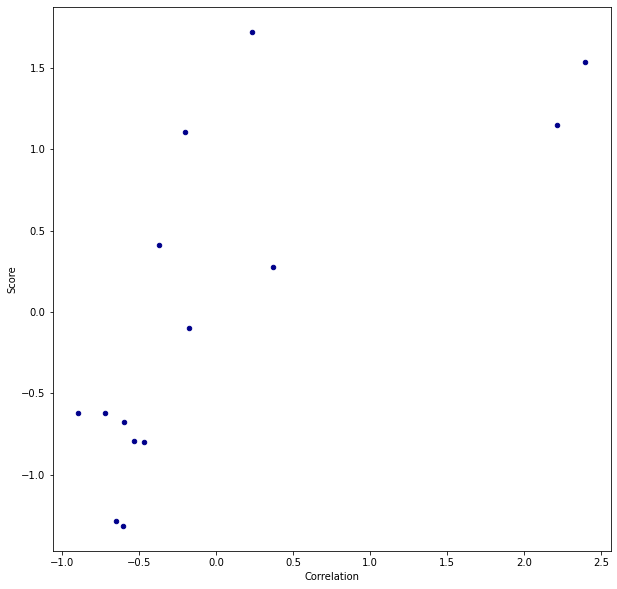

In [98]:
'''
Combining the two df into one so we can see how correlation and Scores behave
'''
final_results_df = pd.merge(df_scores, df_corr, on="Model")
final_results_df = final_results_df.sort_values(by=['Score'],ascending=False)

fig, (ax1) = plt.subplots(1, 1, figsize=(10,10))
ax1.set(xlabel='Correlation', ylabel='Score')
scaler = preprocessing.StandardScaler().fit(final_results_df)
X_scaled = pd.DataFrame(scaler.transform(final_results_df),columns=['Correlation','Score'])
X_scaled.plot(kind='scatter', x='Correlation', y='Score', color='darkblue', ax=ax1)

final_results_df.to_csv('Final_results.csv');

# Summary
### From the above plot we can see that a correlation do exsist betweeen hype and price
### There are some cases (assets) that so not react as well to hype indicator
### This is due maybe to the fact the hype act on different assets in differents ways.
### Some assets act upon Volume and some upon news etc.
### As we saw the correlation between vol and price/hype do exsist
### This mean that for each assets we need first to look how it tendency to this indicator.